Guido's Email: <br> Hi,

Now that you have successfully imported, prepared and explored the data you are ready to start exploring some possible tools for your analysis. When you worked in R you used the caret package for many of your machine learning and data mining tasks. Python has a similar library called Sci-Kit Learn that the client has specifically asked us to use because it is likely to be compatible a custom software solution they plan to deploy.

In this task you’ll build your models just as you have done previously, but with a different set of tools. As you progress remember the following:

Let the data tell the story – don't make any assumptions.
It is often best to build three or more models and compare the results.
Make sure you have chosen the correct tools for the type of data you have.
I suggest you start this task with a quick orientation on Sci-Kit Learn to become familiar with the benefits of using it and how to use it effectively for this project. 

GR 

Guido Rossum
Senior Data Scientist
Credit One
www.creditonellc.com

In [1]:
#imports
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn import tree
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_validation
#from sklearn.cross_validation import train_test_split
#from sklearn import cross_validation

from sklearn.datasets import load_diabetes
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

********
Initial data processing

In [2]:
#data
rawData = pd.read_csv('default of credit card clients.csv', header=1)
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

**************
Removing some small subgroups from certain demographics as they may up a very small portion and removing them could help improve our model's accuracy
**************

In [4]:
rawDataFilter = rawData[((rawData.EDUCATION==1)|(rawData.EDUCATION==2)|(rawData.EDUCATION==3))&(rawData.MARRIAGE>0)]
rawDataFilter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29478 entries, 0 to 29999
Data columns (total 25 columns):
ID                            29478 non-null int64
LIMIT_BAL                     29478 non-null int64
SEX                           29478 non-null int64
EDUCATION                     29478 non-null int64
MARRIAGE                      29478 non-null int64
AGE                           29478 non-null int64
PAY_0                         29478 non-null int64
PAY_2                         29478 non-null int64
PAY_3                         29478 non-null int64
PAY_4                         29478 non-null int64
PAY_5                         29478 non-null int64
PAY_6                         29478 non-null int64
BILL_AMT1                     29478 non-null int64
BILL_AMT2                     29478 non-null int64
BILL_AMT3                     29478 non-null int64
BILL_AMT4                     29478 non-null int64
BILL_AMT5                     29478 non-null int64
BILL_AMT6               

In [65]:
#features
#features = rawData.iloc[:,12:23]
features = rawDataFilter.iloc[:,[1,2,3,4,5,12,14,16]]
print('Summary of feature sample')
features.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT3,BILL_AMT5
0,20000,2,2,1,24,3913,689,0
1,120000,2,2,2,26,2682,2682,3455
2,90000,2,2,2,34,29239,13559,14948
3,50000,2,2,1,37,46990,49291,28959
4,50000,1,2,1,57,8617,35835,19146


*******
Removing Bill amt 2,4,6 due to correlation we previously saw to attempt to avoid any overfitting of model
*******

In [6]:
x = rawDataFilter.iloc[:,1:24]
y = rawDataFilter['default payment next month']

clf = LassoCV().fit(x, y)
importance = np.abs(clf.coef_)
print(importance)

[4.71384683e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.51468755e-07
 1.91161698e-07 2.12840907e-08 8.09393890e-09 2.81915158e-07
 2.84549288e-07 1.06037069e-06 3.33496924e-07 2.90072031e-07
 5.60029770e-07 4.35457528e-07 9.71362936e-08]


Feature importance, higher value = more important.

Demographics appear to not be important but will test them initially as we saw some interesting things in intial discover period.

Will remove payment history and pay amounts as we really cannot control those features.

In [66]:
#features
#features = rawData.iloc[:,12:23]
features = rawDataFilter.iloc[:,[1,2,3,4,5,12,14,16]]
print('Summary of feature sample')
features.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT3,BILL_AMT5
0,20000,2,2,1,24,3913,689,0
1,120000,2,2,2,26,2682,2682,3455
2,90000,2,2,2,34,29239,13559,14948
3,50000,2,2,1,37,46990,49291,28959
4,50000,1,2,1,57,8617,35835,19146


In [67]:
#dependent variable
depVar = rawDataFilter['default payment next month']

In [68]:
#Training Set (Feature Space: X Training)
X_train = (features[: 5000])
X_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT3,BILL_AMT5
0,20000,2,2,1,24,3913,689,0
1,120000,2,2,2,26,2682,2682,3455
2,90000,2,2,2,34,29239,13559,14948
3,50000,2,2,1,37,46990,49291,28959
4,50000,1,2,1,57,8617,35835,19146


In [69]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 5000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 5000


0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: int64

In [70]:
#Testing Set (X Testing)
X_test = features[-1000:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 1000
       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  BILL_AMT1  BILL_AMT3  \
28977      80000    2          1         1   44        -60        595   
28978     200000    2          2         1   48      -1123       3030   
28979     150000    2          1         2   35      55337      53710   
28980     100000    2          3         1   39      10135       1635   
28981     110000    2          1         2   32      46603      51815   

       BILL_AMT5  
28977        737  
28978      10569  
28979      49928  
28980          0  
28981      34975  


In [71]:
#Ground Truth (y_test) 
y_test = depVar[-1000:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 1000


28977    0
28978    1
28979    1
28980    0
28981    0
Name: default payment next month, dtype: int64

In [72]:
X_test.shape

(1000, 8)

In [73]:
X_train.shape

(5000, 8)

In [172]:
#Models
modelSVC = svm.SVC(C=1.0)
modelSGD = SGDClassifier(loss="hinge", penalty="l2", max_iter=10)
modelTree = tree.DecisionTreeClassifier(max_depth=10)

Due to some potential correlation we saw in our initial deep dive we are going to be removing bill amt 3 and 5 and adding some demographic info we found potentially useful from before

In [173]:
modelSVC.fit(X_train,y_train)

SVC()

In [174]:
modelSGD.fit(X_train,y_train)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(max_iter=10)

In [175]:
modelTree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [176]:
print(cross_val_score(modelSVC, X_train, y_train)) 

[0.777 0.777 0.777 0.777 0.778]


In [177]:
print(cross_val_score(modelSGD, X_train, y_train)) 

[0.423 0.777 0.78  0.768 0.778]


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users

In [178]:
print(cross_val_score(modelTree, X_train, y_train)) 

[0.724 0.735 0.719 0.718 0.734]


In [179]:
modelSVC.score(X_train,y_train)

0.7772

In [180]:
modelSGD.score(X_train,y_train)

0.7762

In [181]:
modelTree.score(X_train,y_train)

0.8286

In [182]:
#Model Fitting
modelSVC.fit(X_train,y_train)
print(cross_val_score(modelSVC, X_train, y_train))
modelSVC.score(X_train,y_train)

[0.777 0.777 0.777 0.777 0.778]


0.7772

In [183]:
modelSGD.fit(X_train,y_train)
print(cross_val_score(modelSGD, X_train, y_train)) 
modelSGD.score(X_train,y_train)

[0.402 0.777 0.778 0.777 0.222]


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users

0.6072

In [184]:
modelTree.fit(X_train,y_train)
print(cross_val_score(modelTree, X_train, y_train)) 
modelTree.score(X_train,y_train)

[0.724 0.732 0.716 0.715 0.741]


0.8286

**********
Picking best model from the three above

In [185]:
#Make Predictions
predictions = modelTree.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, predictions))
predRsquared = r2_score(y_test,predictions)
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -0.532
RMSE: 0.534


In [186]:
treeplot = modelTree.fit(X_train,y_train)

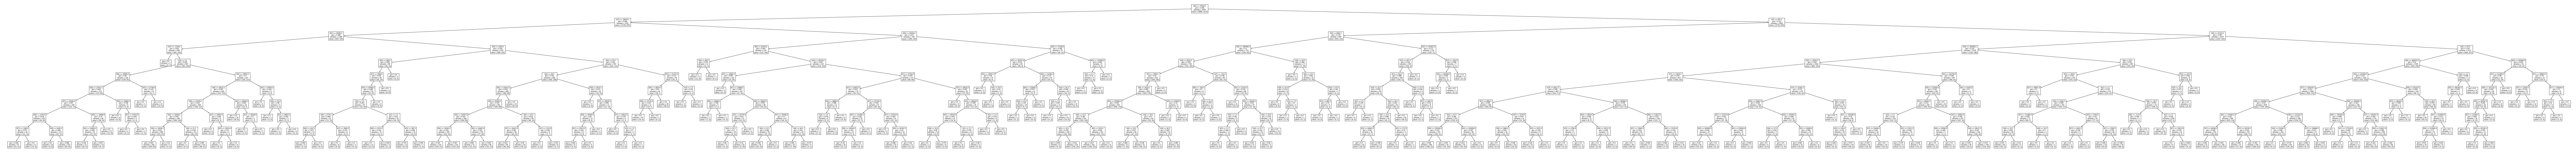

In [194]:
plt.figure(figsize=(250,15))
tree.plot_tree(treeplot);

In [92]:
#features
#features = rawData.iloc[:,12:23]
features = rawDataFilter.iloc[:,[1,2,3,4,5,12,14,16]]
print('Summary of feature sample')
features.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT3,BILL_AMT5
0,20000,2,2,1,24,3913,689,0
1,120000,2,2,2,26,2682,2682,3455
2,90000,2,2,2,34,29239,13559,14948
3,50000,2,2,1,37,46990,49291,28959
4,50000,1,2,1,57,8617,35835,19146
